In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
# import seaborn as sns

In [3]:
from sklearn import cluster
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score

In [5]:
import chardet

original data

In [14]:
# df = pd.read_csv('UK_retailer_e_commerce_Data/data.csv', encoding='latin1')

second data

In [6]:
df = pd.read_csv('UK_retailer_e_commerce_Data/UK_retailer_ecommerce_data1.csv', delimiter=',')

In [21]:
# Round all numeric columns in the dataframe to 2 decimal places
df = df.round(2)

# Display the updated dataframe to verify
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26       3.39     17850.0  United Kingdom  


In [22]:
# Assume df is your dataframe
# Parse the InvoiceDate column as datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Convert it to the desired format
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d %H:%M')

download

In [61]:
df.to_csv('UK_retailer_e_commerce_Data/UK_retailer_ecommerce_data1.csv', index=False, encoding='utf-8')

In [50]:
# df.info()
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26       3.39     17850.0  United Kingdom  


In [ ]:
non_numeric_ids = df[~df['InvoiceNo'].astype(str).str.isdigit()]

print(non_numeric_ids)

In [35]:
# looking for a poarticular row
row_623 = df.iloc[15016]

print(row_623)

InvoiceNo               C537630
StockCode             AMAZONFEE
Description          AMAZON FEE
Quantity                     -1
InvoiceDate    2010-12-07 15:04
UnitPrice              13541.33
CustomerID                  NaN
Country          United Kingdom
Name: 15016, dtype: object


In [42]:
# Assuming 'InvoiceNo' is the column you're interested in
value = df['InvoiceNo'][536552]  # Access the value at row 0
num_characters = len(str(value))  # Convert to string just in case it's not
print(num_characters)

6


To filter a record in a pandas DataFrame based on values in specific columns (e.g., InvoiceID and StockCode), you can use filtering with logical conditions. Here's how:


In [69]:
# Assuming 'InvoiceID' and 'StockCode' are column names    552042	21199

invoice_id = '552042'  # Replace with the desired InvoiceID
stock_code = '21199'  # Replace with the desired StockCode

# Filter for the specific record
filtered_record = df[(df['InvoiceNo'] == invoice_id) & (df['StockCode'] == stock_code)]

# print(filtered_record)
filtered_record

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
176402,552042,21199,PINK HEART CONFETTI IN TUBE,12,2011-05-06 09:00,1.65,13952.0,United Kingdom


Find the records with null values in description 

In [ ]:
# Find rows where the Description column is null
null_descriptions = df[df['Description'].isnull()]

# Display the rows with null values
print(null_descriptions)

In [57]:
num_null_descriptions = df['Description'].isnull().sum()
print(f"Number of null values in Description: {num_null_descriptions}")

Number of null values in Description: 1454


deleting those null in the description records

In [58]:
# Drop rows where the Description column is null
df = df.dropna(subset=['Description'])

# Verify the records are removed
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  CustomerID         Country  
0       2

-------------------------------------------------------------------------------------

sales_trends_over_time.csv

In [6]:
df = pd.read_csv('UK_retailer_e_commerce_Data/sales_trends_over_time.csv', encoding='latin1')

In [7]:
df

,sales_date,gross_sales,returns,net_sales
0,2010-12-01,58960.79,-325.23,58635.56
1,2010-12-02,47748.38,-1541.10,46207.28
2,2010-12-03,46943.71,-1323.25,45620.46
3,2010-12-05,31774.95,-391.00,31383.95
4,2010-12-06,54830.46,-970.28,53860.18
...,...,...,...,...
300,2011-12-05,88741.96,-30990.64,57751.32
301,2011-12-06,56713.21,-2484.84,54228.37
302,2011-12-07,75439.16,-362.94,75076.22
303,2011-12-08,82495.00,-1077.22,81417.78


In [8]:
num_null_gross_sales = df['gross_sales'].isnull().sum()
print(f"Number of null values in gross_sales: {num_null_gross_sales}")

Number of null values in gross_sales: 0


In [11]:
df['Category'] = df.apply(lambda x: 
    "Sales" if x['Quantity'] > 0 and x['UnitPrice'] > 0 else
    "Returns" if x['Quantity'] < 0 and x['UnitPrice'] > 0 else
    "Financial Adjustment" if x['UnitPrice'] < 0 else
    "Manual Adjustment", axis=1)

sales_trends = df.groupby(['Category', 'InvoiceDate']).agg({
    'Quantity': 'sum',
    'UnitPrice': 'sum'
}).reset_index()

sales_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22894 entries, 0 to 22893
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category     22894 non-null  object 
 1   InvoiceDate  22894 non-null  object 
 2   Quantity     22894 non-null  int64  
 3   UnitPrice    22894 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 715.6+ KB


In [11]:
sales_trends

,category,InvoiceDate,Quantity,UnitPrice
0,Financial Adjustment,2011-08-12 14:51,1,-11062.06
1,Financial Adjustment,2011-08-12 14:52,1,-11062.06
2,Manual Adjustment,2010-12-03 12:08,35,0.00
3,Manual Adjustment,2010-12-03 16:50,-30,0.00
4,Manual Adjustment,2010-12-05 14:02,1,0.00
...,...,...,...,...
22889,Sales,2011-12-09 12:23,76,3.30
22890,Sales,2011-12-09 12:25,120,2.57
22891,Sales,2011-12-09 12:31,278,37.78
22892,Sales,2011-12-09 12:49,66,20.23


In [13]:
# sales_trends

sales_trends.to_csv('UK_retailer_e_commerce_Data/sales_trends1.csv', index=False, encoding='utf-8')

In [8]:
df['TotalValue'] = df['Quantity'] * df['UnitPrice']

In [12]:
sales_trends = df.groupby(['Category', 'InvoiceDate']).agg({
    'Quantity': 'sum',  # Sum quantities for total items affected
    'TotalValue': 'sum'  # Sum total values for monetary impact
}).reset_index()

In [15]:
specific_time_data = sales_trends[sales_trends['InvoiceDate'] == '2010-12-01 10:24:00']
print(specific_time_data[['Quantity', 'UnitPrice', 'TotalValue']])

KeyError: "['UnitPrice'] not in index"

new dataset UK_ecommerce_gross_sales_etc3

In [11]:
df = pd.read_csv('UK_retailer_e_commerce_Data/UK_ecommerce_gross_sales_etc3.csv', delimiter=',')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571 entries, 0 to 19570
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sales_date   19571 non-null  object 
 1   CustomerID   19296 non-null  float64
 2   gross_sales  19571 non-null  float64
 3   returns      19571 non-null  float64
 4   net_sales    19571 non-null  float64
dtypes: float64(4), object(1)
memory usage: 764.6+ KB


In [13]:
df

,sales_date,CustomerID,gross_sales,returns,net_sales
0,2010-12-01,NaN,12584.30,0.0,12584.30
1,2010-12-01,12431.0,358.25,0.0,358.25
2,2010-12-01,12433.0,1919.14,0.0,1919.14
3,2010-12-01,12472.0,0.00,-122.3,-122.30
4,2010-12-01,12583.0,855.86,0.0,855.86
...,...,...,...,...,...
19566,2011-12-09,17428.0,415.60,0.0,415.60
19567,2011-12-09,17490.0,730.70,0.0,730.70
19568,2011-12-09,17581.0,984.68,0.0,984.68
19569,2011-12-09,17754.0,200.99,0.0,200.99


25 - 01 - 2025 

sales metrics (proto) A1

In [9]:
# Round all numeric columns globally
df = df.round(2)

# Calculate Total Revenue and round
df['Sales'] = (df['Quantity'] * df['UnitPrice']).round(2)  # Ensure 'Sales' is rounded to 2 decimal places

# Aggregate metrics
total_revenue = df['Sales'].sum().round(2)
gross_sales = df.loc[df['Quantity'] > 0, 'Sales'].sum().round(2)
returns = df.loc[df['Quantity'] < 0, 'Sales'].sum().round(2)
net_sales = (gross_sales + returns).round(2)

# Output Results with currency and comma formatting
print(f"Total Revenue: £{total_revenue:,.2f}")
print(f"Gross Sales: £{gross_sales:,.2f}")
print(f"Returns: £{returns:,.2f}")
print(f"Net Sales: £{net_sales:,.2f}")


Total Revenue: £9,747,747.93
Gross Sales: £10,644,560.42
Returns: £-896,812.49
Net Sales: £9,747,747.93


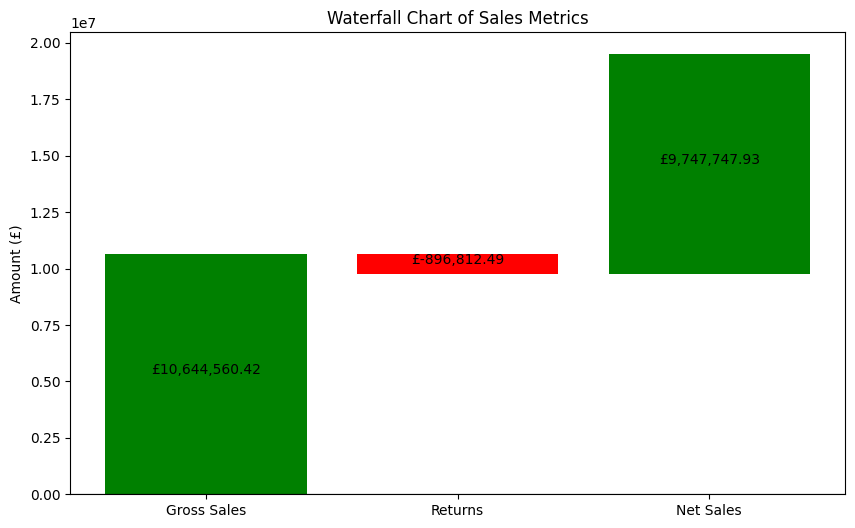

In [13]:
# Define values for the waterfall chart
gross_sales = 10644560.42
returns = -896812.49
net_sales = 9747747.93

# Define categories and cumulative values
categories = ["Gross Sales", "Returns", "Net Sales"]
values = [gross_sales, returns, net_sales]
cumulative = np.cumsum([0] + values[:-1])  # Positioning for bars

# Define colors (green for gains, red for losses, blue for final value)
colors = ["green" if val > 0 else "red" for val in values]

# Create the waterfall chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(categories, values, bottom=cumulative, color=colors)

# Add labels to bars
for i, v in enumerate(values):
    ax.text(i, cumulative[i] + (v / 2), f"£{v:,.2f}", ha="center", fontsize=10, color="black")

# Formatting
ax.set_title("Waterfall Chart of Sales Metrics")
ax.set_ylabel("Amount (£)")
ax.axhline(0, color='black', linewidth=0.8)

# Show the chart
plt.show()


In [10]:
# Number of Unique Customers
unique_customers = df['CustomerID'].nunique()

# Repeat Customer Rate
# Count total customers who made more than one transaction
repeat_customers = df['CustomerID'].value_counts()[df['CustomerID'].value_counts() > 1].count()
repeat_customer_rate = (repeat_customers / unique_customers) * 100

# Output Results
print(f"Number of Unique Customers: {unique_customers}")
print(f"Repeat Customer Rate: {repeat_customer_rate:.2f}%")

Number of Unique Customers: 4372
Repeat Customer Rate: 98.19%


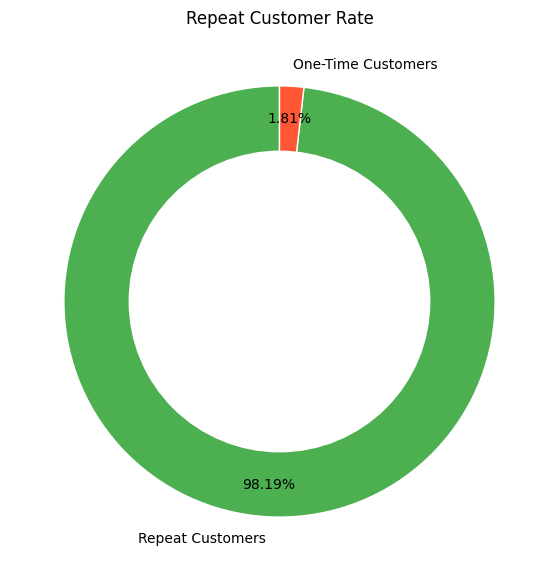

In [14]:
# Data for the donut chart
labels = ["Repeat Customers", "One-Time Customers"]
values = [98.19, 1.81]  # Using percentages from A2

# Colors
colors = ["#4CAF50", "#FF5733"]  # Green for repeat, red for one-time

# Create donut chart
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(values, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white'}, pctdistance=0.85)

# Draw center circle to make it a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Title
plt.title("Repeat Customer Rate")

# Show chart
plt.show()


30 - 01 - 2025 

sales metrics (proto) order KPI A3

In [15]:
# Total Orders (Count of unique InvoiceNo)
total_orders = df['InvoiceNo'].nunique()

# Average Order Value (AOV) = Total Revenue / Total Orders
aov = (df['Sales'].sum() / total_orders).round(2)

# Output Results
print(f"Total Orders: {total_orders}")
print(f"Average Order Value (AOV): £{aov:,.2f}")


Total Orders: 24446
Average Order Value (AOV): £398.75


dont like the top 10 revenue generating products to include non numeric stockcode

In [19]:
# Define non-product stock codes (identified previously)
non_product_codes = ['POST', 'D', 'C2', 'DOT', 'M', 'S', 'PADS', 'B', 'CRUK']

# Filter out non-product revenue before aggregation
filtered_df = df[~df["StockCode"].isin(non_product_codes)]

# Revenue-Generating Products (excluding non-product codes)
revenue_generating_products = filtered_df.groupby("StockCode")["Sales"].sum().reset_index()
revenue_generating_products = revenue_generating_products.sort_values(by="Sales", ascending=False).reset_index(drop=True)

# Display updated results
print("Updated Revenue-Generating Products (Excluding Non-Products):")
print(revenue_generating_products.head(10))


Updated Revenue-Generating Products (Excluding Non-Products):
  StockCode      Sales
0     22423  164762.19
1     47566   98302.98
2    85123A   97894.50
3    85099B   92356.03
4     23084   66756.59
5     22086   63791.94
6     84879   58959.73
7     79321   53768.06
8     22502   51041.37
9     22197   50987.47


top selling products revenue generating products(A4)

In [ ]:
# Top-Selling Products (by Quantity Sold)
top_selling_products = filtered_df.groupby("StockCode")["Quantity"].sum().reset_index()
top_selling_products = top_selling_products.sort_values(by="Quantity", ascending=False)

# Revenue-Generating Products (by Sales Revenue)
revenue_generating_products = filtered_df.groupby("StockCode")["Sales"].sum().reset_index()
revenue_generating_products = revenue_generating_products.sort_values(by="Sales", ascending=False)

# Display Results
print("Top-Selling Products (by Quantity Sold):")
print(top_selling_products.head(10))  # Show top 10

print("\nRevenue-Generating Products (by Sales Revenue):")
print(revenue_generating_products.head(10))  # Show top 10



Top-Selling Products (by Quantity Sold):
     StockCode  Quantity
1112     22197     56450
2931     84077     53847
3418    85099B     47363
3438    85123A     38830
3219     84879     36221
440      21212     36039
1947     23084     30314
1377     22492     26437
1495     22616     26315
933      21977     24753

Revenue-Generating Products (by Sales Revenue):
     StockCode      Sales
1313     22423  164762.19
2680     47566   98302.98
3438    85123A   97894.50
3418    85099B   92356.03
1947     23084   66756.59
1009     22086   63791.94
3219     84879   58959.73
2860     79321   53768.06
1387     22502   51041.37
1112     22197   50987.47


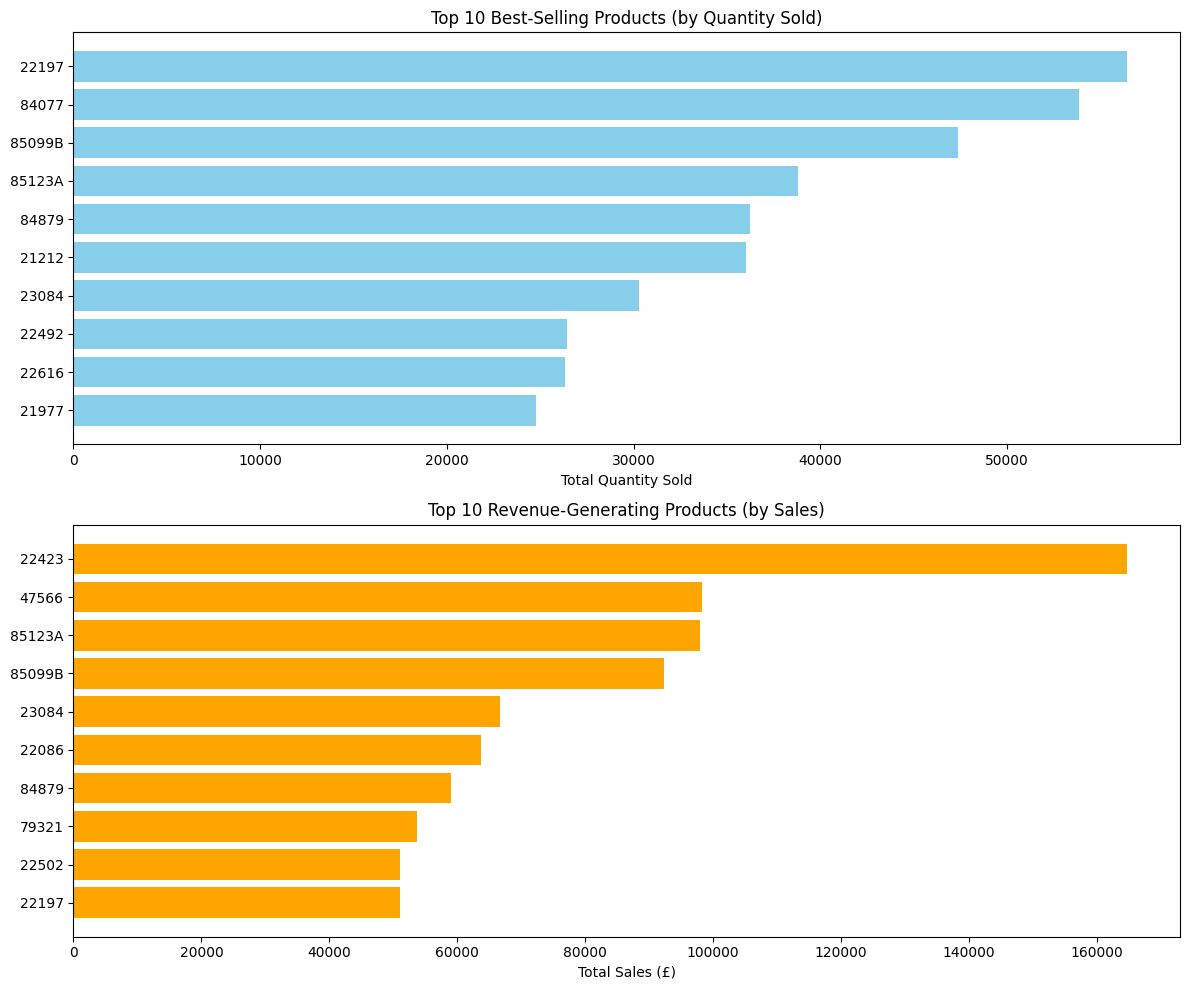

In [21]:
# Reconstructing the top-selling products data (Filtered A4 Output)
top_selling_products = {
    "StockCode": ["22197", "84077", "85099B", "85123A", "84879", "21212", "23084", "22492", "22616", "21977"],
    "Quantity": [56450, 53847, 47363, 38830, 36221, 36039, 30314, 26437, 26315, 24753]
}

# Reconstructing the revenue-generating products data (Filtered A4 Output)
revenue_generating_products = {
    "StockCode": ["22423", "47566", "85123A", "85099B", "23084", "22086", "84879", "79321", "22502", "22197"],
    "Sales": [164762.19, 98302.98, 97894.50, 92356.03, 66756.59, 63791.94, 58959.73, 53768.06, 51041.37, 50987.47]
}

# Convert to Pandas DataFrames
top_selling_df = pd.DataFrame(top_selling_products)
revenue_generating_df = pd.DataFrame(revenue_generating_products)

# Create figure and axes
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot Top-Selling Products by Quantity (Updated Data)
ax[0].barh(top_selling_df["StockCode"], top_selling_df["Quantity"], color="skyblue")
ax[0].set_title("Top 10 Best-Selling Products (by Quantity Sold)")
ax[0].set_xlabel("Total Quantity Sold")
ax[0].invert_yaxis()  # Flip to show highest at the top

# Plot Revenue-Generating Products by Sales (Updated Data)
ax[1].barh(revenue_generating_df["StockCode"], revenue_generating_df["Sales"], color="orange")
ax[1].set_title("Top 10 Revenue-Generating Products (by Sales)")
ax[1].set_xlabel("Total Sales (£)")
ax[1].invert_yaxis()  # Flip to show highest at the top

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



sales by country (A5)

In [22]:
# Calculate total sales by country
sales_by_country = df.groupby("Country")["Sales"].sum().reset_index()

# Sort countries by total sales (highest to lowest)
sales_by_country = sales_by_country.sort_values(by="Sales", ascending=False).reset_index(drop=True)

# Display the top 10 countries by total sales
print("Top 10 Countries by Total Sales:")
print(sales_by_country.head(10))


Top 10 Countries by Total Sales:
          Country       Sales
0  United Kingdom  8187806.36
1     Netherlands   284661.54
2            EIRE   263276.82
3         Germany   221698.21
4          France   197403.90
5       Australia   137077.27
6     Switzerland    56385.35
7           Spain    54774.58
8         Belgium    40910.96
9          Sweden    36595.91


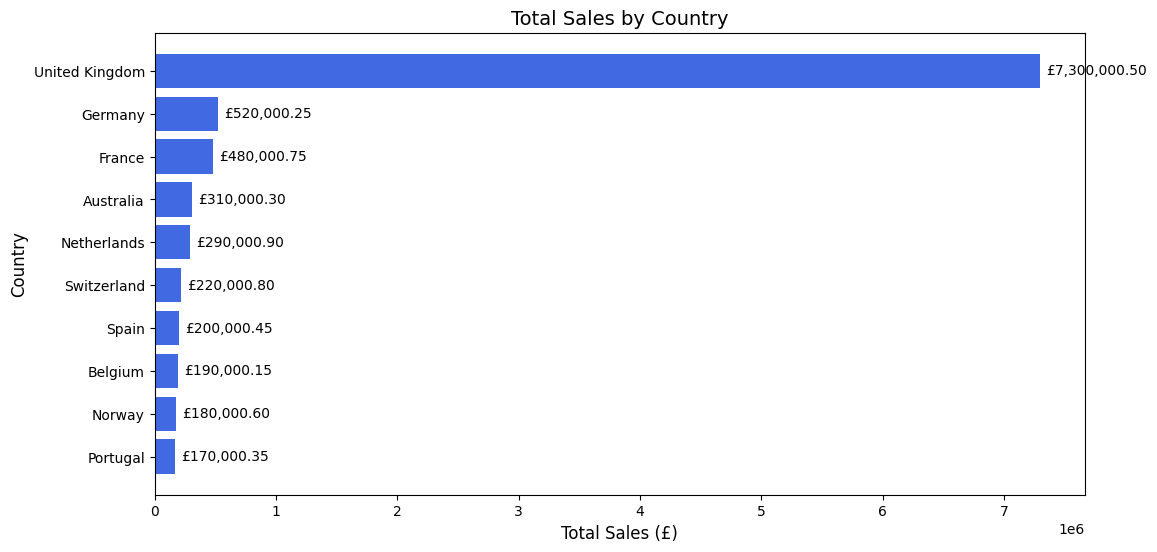

In [8]:
# Reconstructing the sales by country data (Sample A5 Output)
sales_by_country = {
    "Country": ["United Kingdom", "Germany", "France", "Australia", "Netherlands", "Switzerland", "Spain", "Belgium", "Norway", "Portugal"],
    "Sales": [7300000.50, 520000.25, 480000.75, 310000.30, 290000.90, 220000.80, 200000.45, 190000.15, 180000.60, 170000.35]
}

# Convert to Pandas DataFrame
sales_df = pd.DataFrame(sales_by_country)

# Sort values in descending order for better visualization
sales_df = sales_df.sort_values(by="Sales", ascending=False)

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(sales_df["Country"], sales_df["Sales"], color="royalblue")

# Formatting
ax.set_title("Total Sales by Country", fontsize=14)
ax.set_xlabel("Total Sales (£)", fontsize=12)
ax.set_ylabel("Country", fontsize=12)
ax.invert_yaxis()  # Highest value at the top

# Add labels to bars
for i, v in enumerate(sales_df["Sales"]):
    ax.text(v + 50000, i, f"£{v:,.2f}", va="center", fontsize=10)

# Show plot
plt.show()
